# A Guide to The Gradient Boosting Algorithm

#### Introduction
- Overview of Gradient Boosting
- Importance in predictive modeling
- Real-world applications and performance

#### H2: What is Boosting?
- Definition and basic concept
- Role in ensemble learning
#### From AdaBoost to Gradient Boosting
- Transition from AdaBoost to Gradient Boosting
- Distinctions between the two methods​​.
#### The Mechanics of Gradient Boosting
- Core Components of Gradient Boosting
- Loss Function: Role and types
- Weak Learners: Decision trees as a foundation
- Additive Model: Combining weak learners​​.
#### Gradient Boosting Algorithm in Action
- Sequential model building
- Minimizing errors through residuals
- Regression vs. Classification: Different approaches based on data type​​.
#### Practical Implementation with Examples
- Building a Gradient Boosting Model
- Step-by-Step Example: Using a continuous target column
- Calculating pseudo residuals
- Generating new predictions.
#### Tuning and Optimization
- Understanding and setting the learning rate
- The role of n_estimators in model accuracy
- Adjusting max_depth for tree complexity​​​​.
#### H2: Advanced Concepts in Gradient Boosting
##### Regularization Techniques
- Tree constraints
- Shrinkage: Controlling the learning rate
- Stochastic Gradient Boosting
- Penalized Gradient Boosting​​.
#### H2: Case Studies and Applications
##### Real-World Applications of Gradient Boosting
- Success stories in Kaggle competitions
- Use cases in business and industry​​.
#### H2: Conclusion and Further Learning


## Introduction

The body of this article is long (but highly-educational) so, we will make the intro as short as possible, directly starting with the question "Why bother with gradient boosting?".

There are a number of excellent reasons:

1. **Gradient boosting is the best**: its accuracy and performance is unmatched for tabular supervised-learning tasks. 
2. **Gradient boosting is highly versatile**: it can be used in many important tasks such as regression, classification, ranking and survival analysis.
3. **Gradient boosting is interpretable**: unlike many black-box algorithms like neural networks, gradient boosting does not sacrifice interpretability for performance. It works like a Swiss watch and yet, with patience, you can teach how it works to a school kid. 
4. **Gradient boosting is well-implemented**: it is not one of those algorithms that have little practical value. Various libraries like XGBoost and LightGBM in Python are used by hundreds of thousands of people.
5. **Gradient boosting wins**: since 2015, professionals use it to consistently win tabular competitions on platforms like Kaggle. 

If any of these points are even remotely appealing, it would be worth to continue reading this article.

So, let's get started!

## What you will learn in this tutorial?

The most important takeaway of this article is that you leave with a very firm grasp of the inner workings of gradient boosting without much mathematical headache. After all, gradient boosting is for usage in practice not for analyzing mathematically.

Here is the table of contents: TODO later.

## What is gradient boosting in general?

Boosting is a powerful **ensemble learning** technique in machine learning. Unlike traditional models that learn from the data independently, boosting combines the predictions of multiple **weak learners** to create a single, more accurate **strong learner**.

I just wrote a bunch of new terms, so let me explain each, starting with weak learners.

A weak learner is a machine learning model that is slightly better than a random guessing model. For example, let's say we are classifying mushrooms into edible and inedible. Our random guessing model performs with an accuracy of 40%. In this context, a weak learner would be a model that performs a bit better, maybe 50-60% accuracy. 

What boosting does is that it combines dozens or hundreds of these weak learners to build a final strong learner that is easily capable of reaching over 95% accuracy on the same problem. This indicates that all implementations of gradient boosting are ensemble learning techniques. 

The most popular choice for a weak learner is a decision tree. Decision trees are weak enough to be used in gradient boosting but flexible enough to find patterns in all kinds of datasets. If you are not familiar with decision trees, I recommend [this YouTube video](https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer) by StatQuest and [this DataCamp tutorial](https://www.datacamp.com/tutorial/decision-tree-classification-python).

## Real-world applications of gradient boosting

Gradient boosting has become such a dominant force in machine learning that its applications now span various industries, from predicting customer churn to detecting asteroids. Here's a glimpse into its success stories in Kaggle and real-world use cases:

Dominating Kaggle competitions:
- **Otto Group Product Classification Challenge**: all top 10 positions used XGBoost implementation of gradient boosting.
- **Santander Customer Transaction Prediction**: XGBoost-based solutions again secured the top spots for predicting customer behavior and financial transactions.
- **Netflix Movie Recommendation Challenge**: Gradient boosting played a crucial role in building recommendation systems for multi-billion companies like Netflix.

Transforming business and industry:
- **Retail and e-commerce**: personalized recommendations, inventory management, fraud detection
- **Finance and insurance**: credit risk assessment, churn prediction, algorithmic trading
- **Healthcare and medicine**: disease diagnosis, drug discovery, personalized medicine
- **Search and Online Advertising**: search ranking, ad targeting, click-through rate prediction

So, let's finally peek under the hood of this legendary algorithm!

## Gradient boosting algorithm, step-by-step

### Input

Gradient boosting algorithm works for tabular data, specifically, data with a set of features (`X`) and a target (`y`). Like other machine learning algorithms, the aim is to learn enough from the training data to generalize well to unseen data points. 

To understand the underlying process of gradient boosting, we will use a simple sales dataset with four rows. Using three features - the age of the customer, the category of the purchase and the purchase weight, we want to predict the purchase amount:

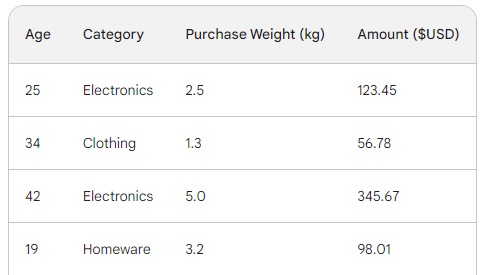

### The loss function in gradient boosting

In machine learning, a loss function is a critical component that lets us quantify the difference between a model's predictions and the actual values. In essence, it measures how a model is performing.

Here is a breakdown of its role:

- **Calculates the error**: Takes the predicted output of the model and compares it to the ground truth (actual observed values). How it _compares_, i.e. calculates the difference, varies from function to function.
- **Guides model training**: a model's objective is to minimize the loss function. Throughout training, model continually updates its internal architecture and configuration to make the loss as little as possible.
- **Evaluation metric**: By comparing the loss on training, validation and test datasets, you can assess your model's ability to generalize and avoid overfitting.

The two most common loss functions are:

- **Mean Squared Error (MSE)**: This popular loss function for regression measures the sum of the squared differences between predicted and actual values. Gradient boosting often uses this variation of it:

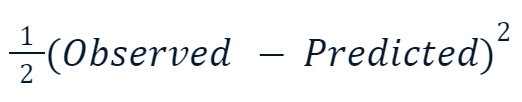

The reason the squared value is multiplied by one half (0.5) has got to do with differentiation. When we take the derivative of this loss function, one half cancels out with the square because of [the power rule](https://www.khanacademy.org/math/old-ap-calculus-ab/ab-derivative-rules/ab-diff-negative-fraction-powers/a/power-rule-review). So, the final result would just be `(Observed - Predicted)`, making math much easier and less computationally expensive. 

- **Cross-entropy**: This function measures the difference between two probability distribution. So, it is commonly used for classification tasks where the target are discrete categories. 

Since we are doing regression, we will use MSE.

### Step 1: Make an initial prediction

Gradient boosting is an algorithm that gradually increases its accuracy. To start the process, we need an initial guess or prediction. And the initial guess is always the average of the target. In other words, for the first round, our model predicts that all purchases were the same - 156 dollars:

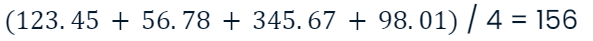

The reason for choosing the average has to do with our chosen loss function and its derivative. Every step of the way, we are searching for a value to find the minimum of the loss function. In other words, we are looking for a value that makes the derivative (gradient) of the loss function 0.

And when we take the derivative of the loss function for each observed value with respect to the predicted and sum them up, we end up with the average of the target (math [here](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)).

So, our initial prediction is the average - 156. Hold it in memory as we continue.

### Step 2: Calculate the pseudo-residuals

The next step is to find the differences between each observed value and our initial prediction: `156 - Observed`. For illustration, we will put those differences in a new column:

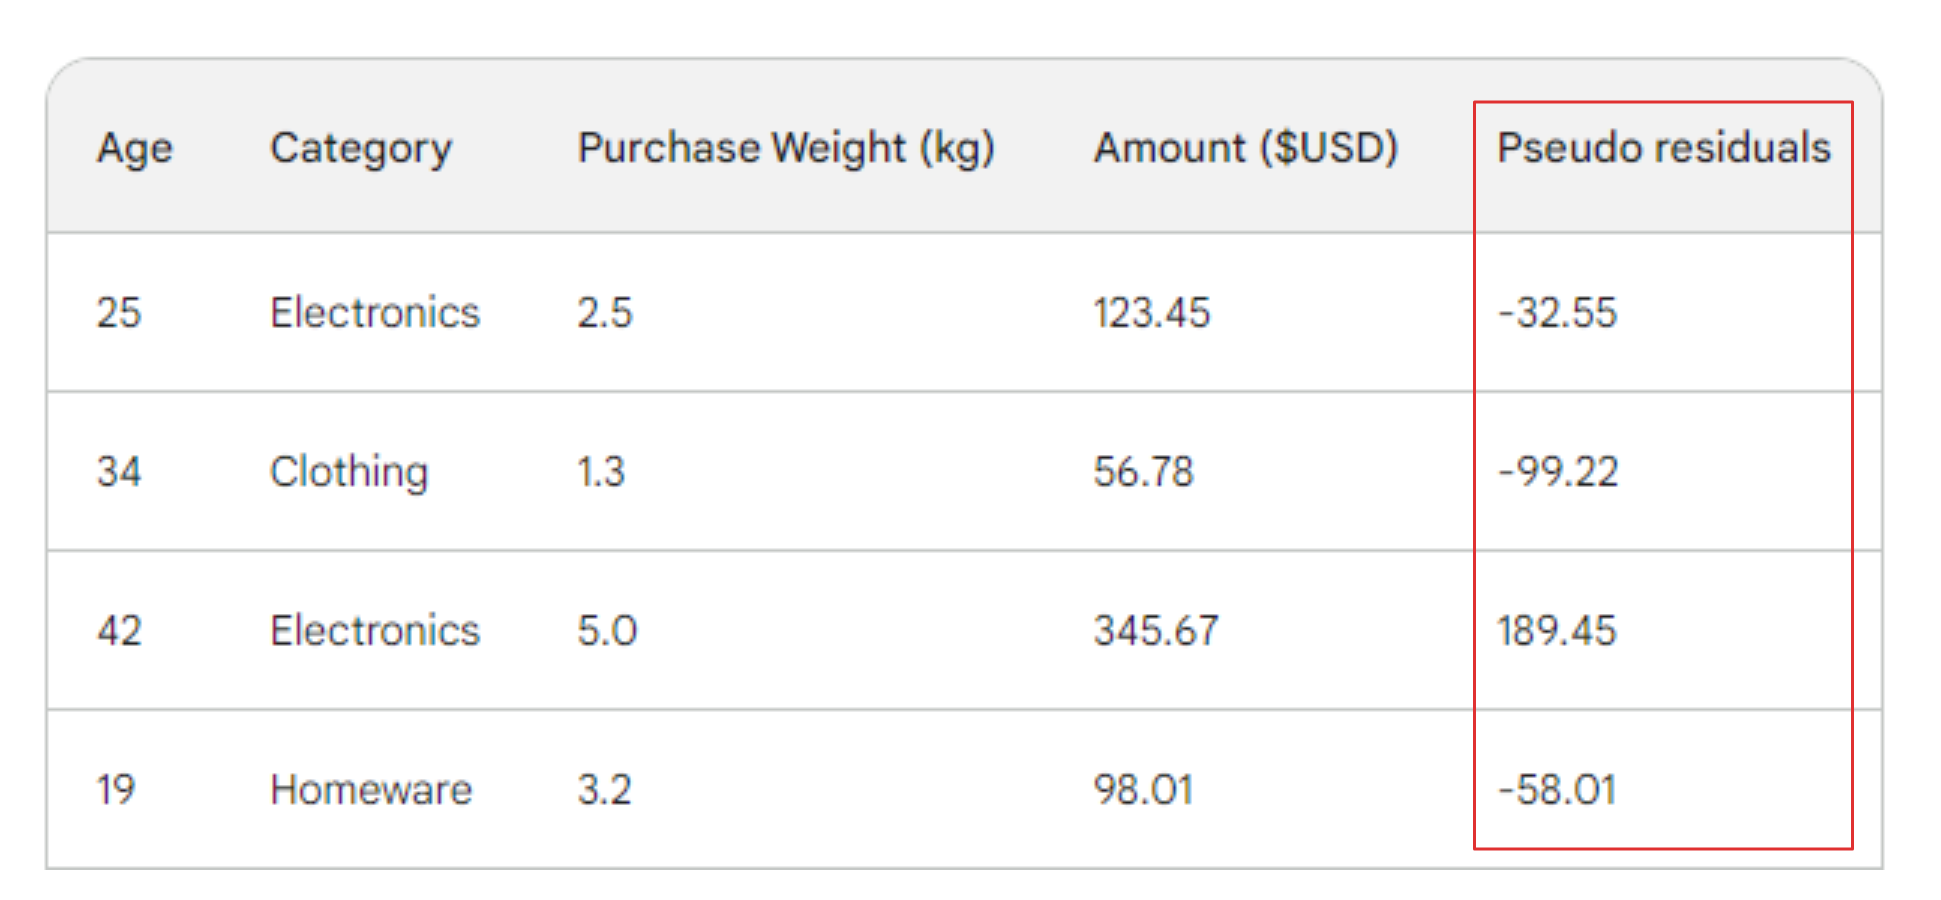

Remember that in linear regression, the difference between observed values and predicted values are called **residuals**. To differentiate linear regression and gradient boosting, we call them _pseudo-residuals_ (there are other reasons they are named this way but we won't go into them in this article). 

### Step 3: Build a weak learner

Next, we will build a decision tree (weak learner) that predicts the residuals using the three features we have (age, category, purchase weight). For this problem, we will limit the decision tree to just four leaves (terminal nodes) but in practice, people usually choose leaves between 8 and 32. 

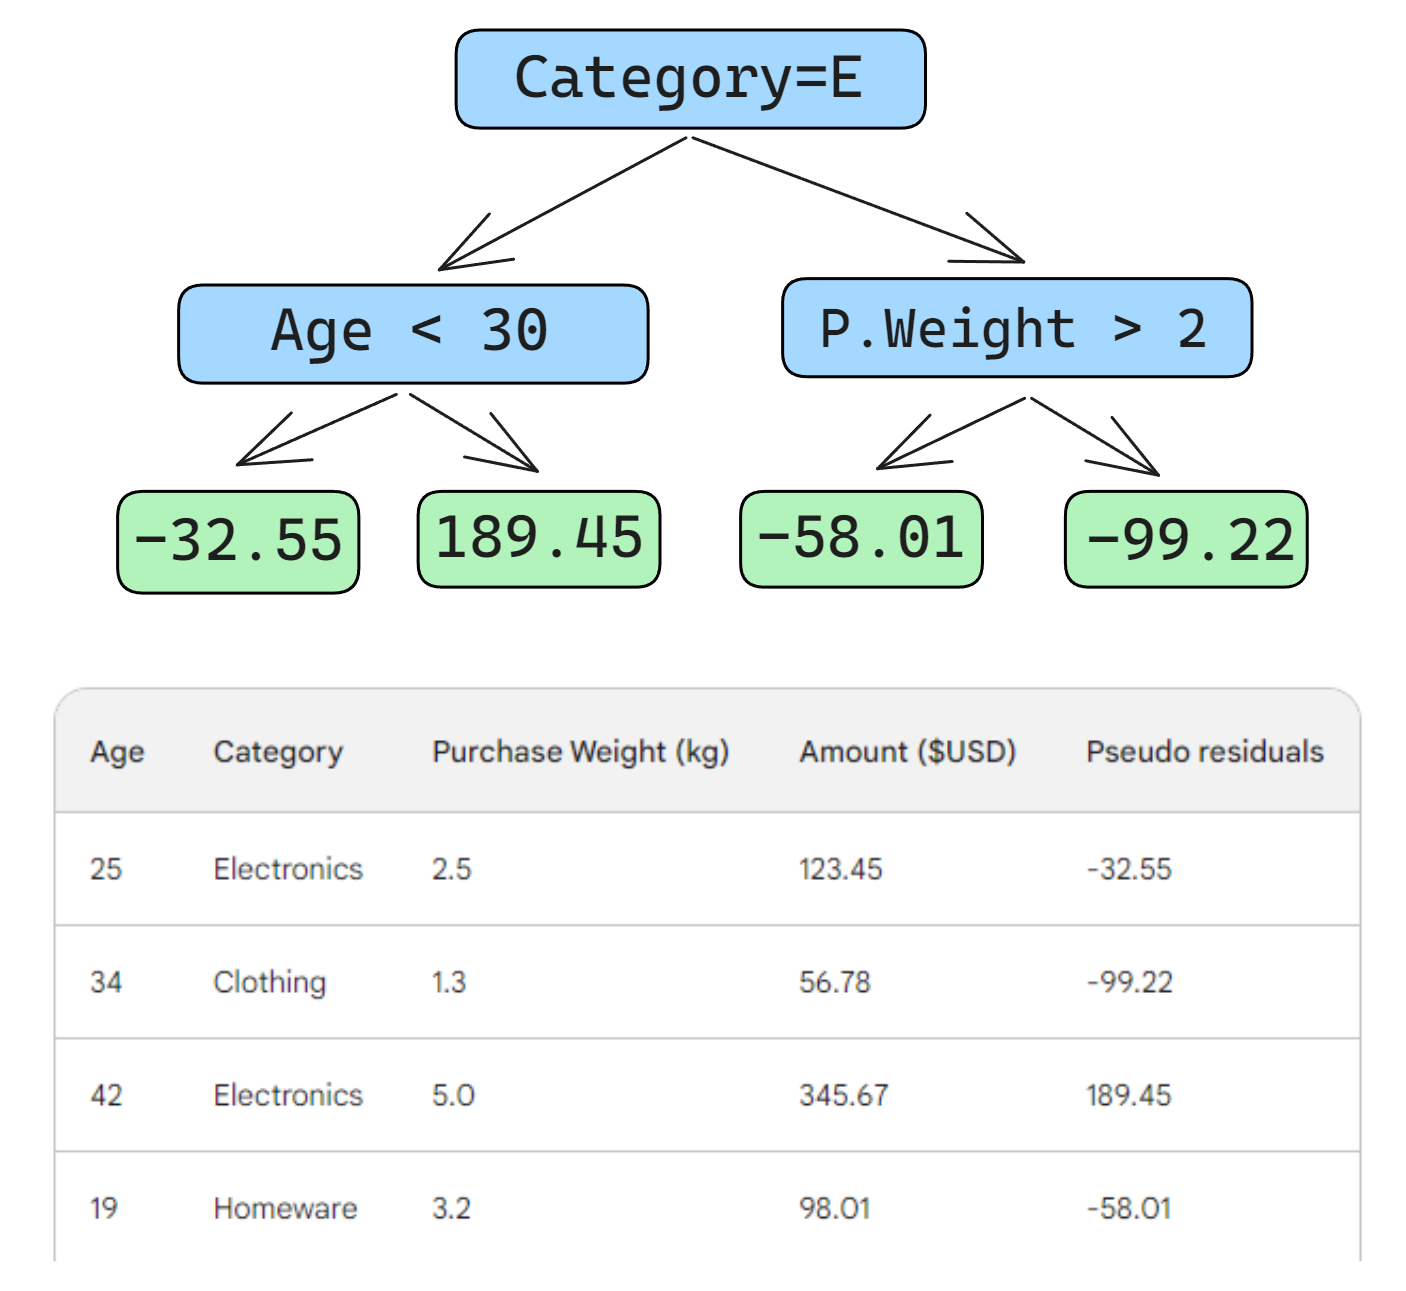

After the tree is fit to the data, we make a prediction for each row in the data. Here is how to do the first one:

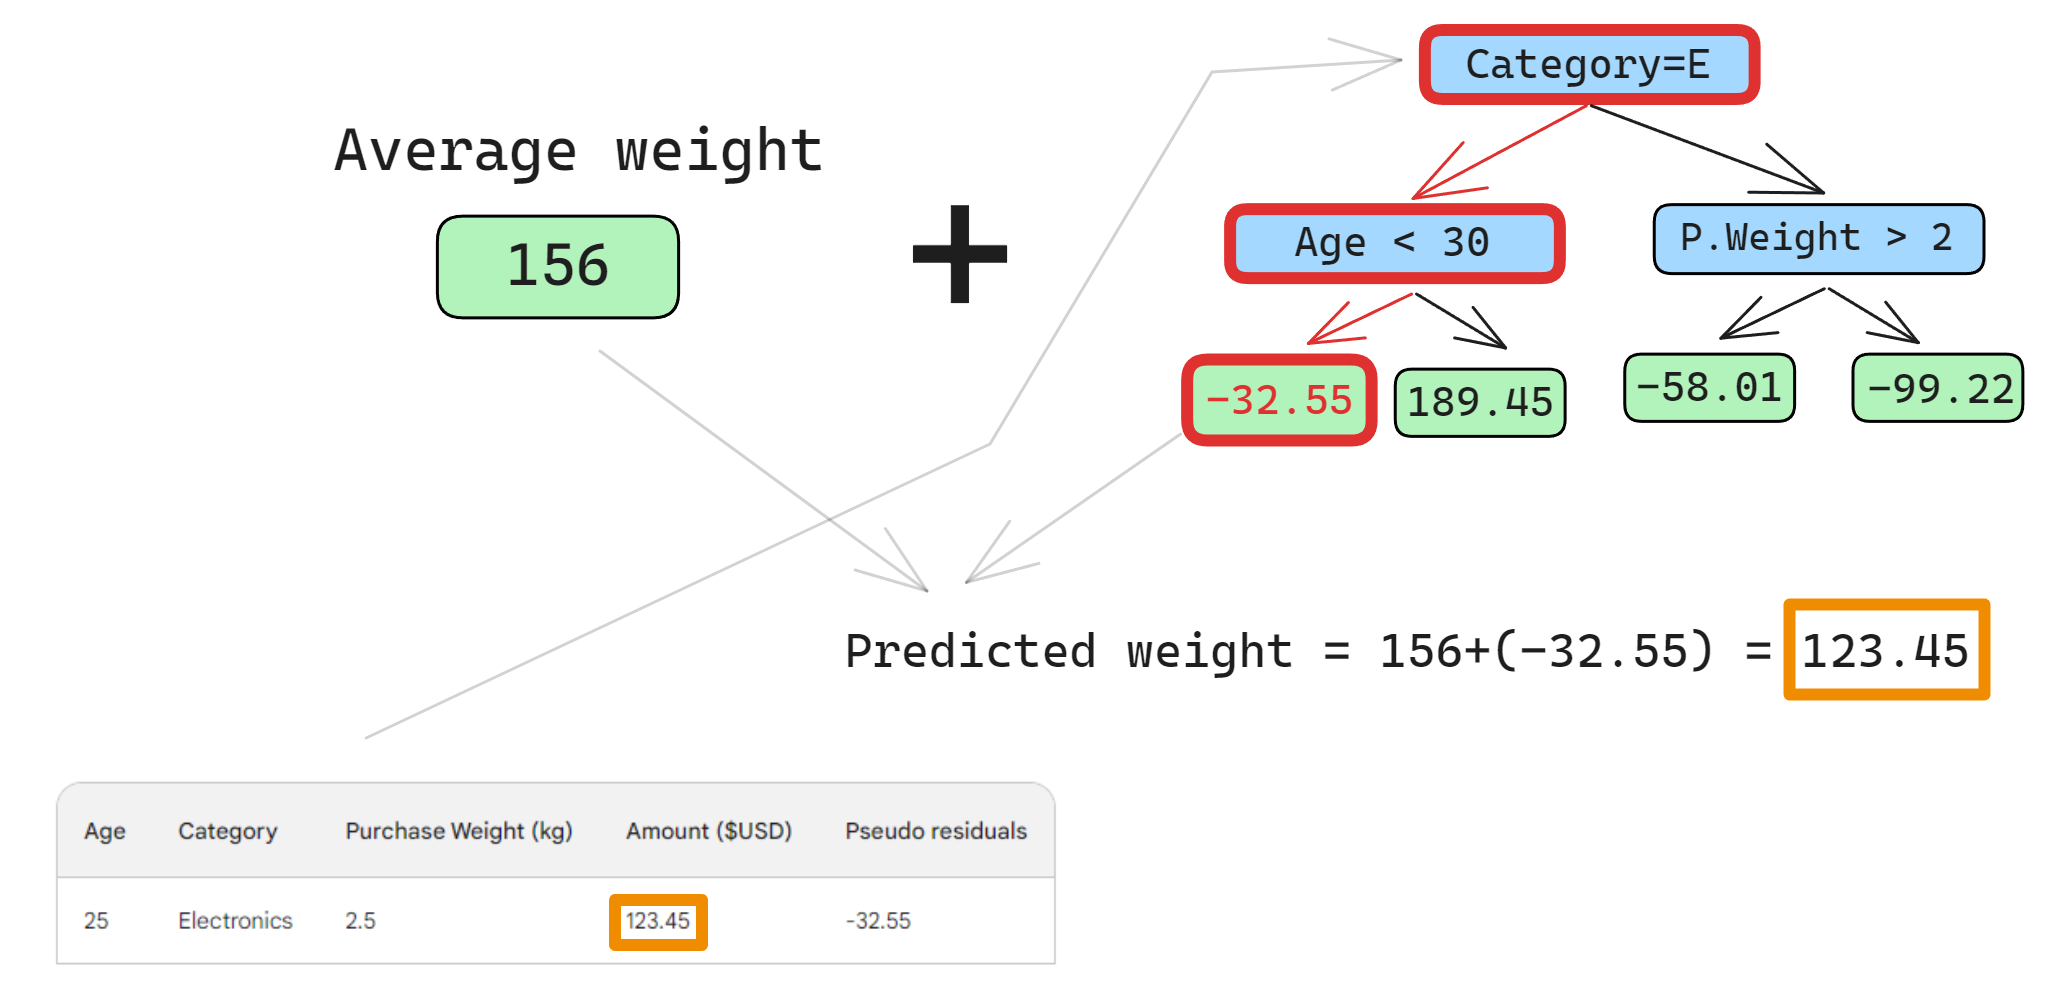

The first row has the following features: a category of electronics (the left of the root node) and customer age below 30 (the left of the child node). This puts -32.55 into the leaf node. To make the final prediction, we add -32.55 to our first prediction, which is exactly the same as the observed value - 123.45 dollars!

We just made a perfect prediction, so why bother with building other trees? Well, right now, we are heavily overfitting to the training data. We want the model generalize. So, to mitigate this problem, gradient boosting has a parameter called **learning rate**.

Learning rate in gradient boosting is simply a multiplier between 0 and 1 that scales the prediction of each weak learner. When we add an arbitrary learning rate of 0.1 into the mix, our prediction becomes 152.75, not the perfect 123.45.

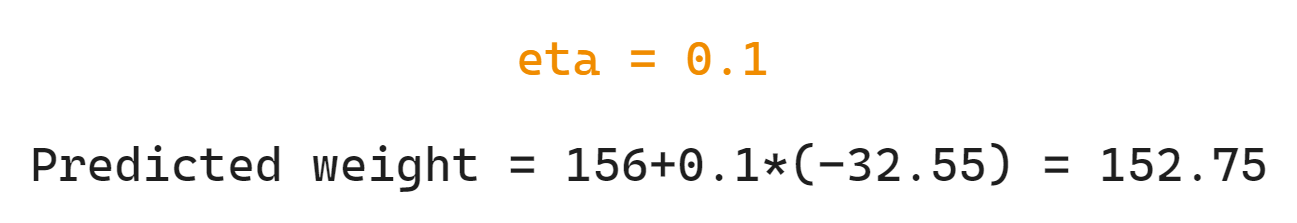

Let's predict on the second as well:

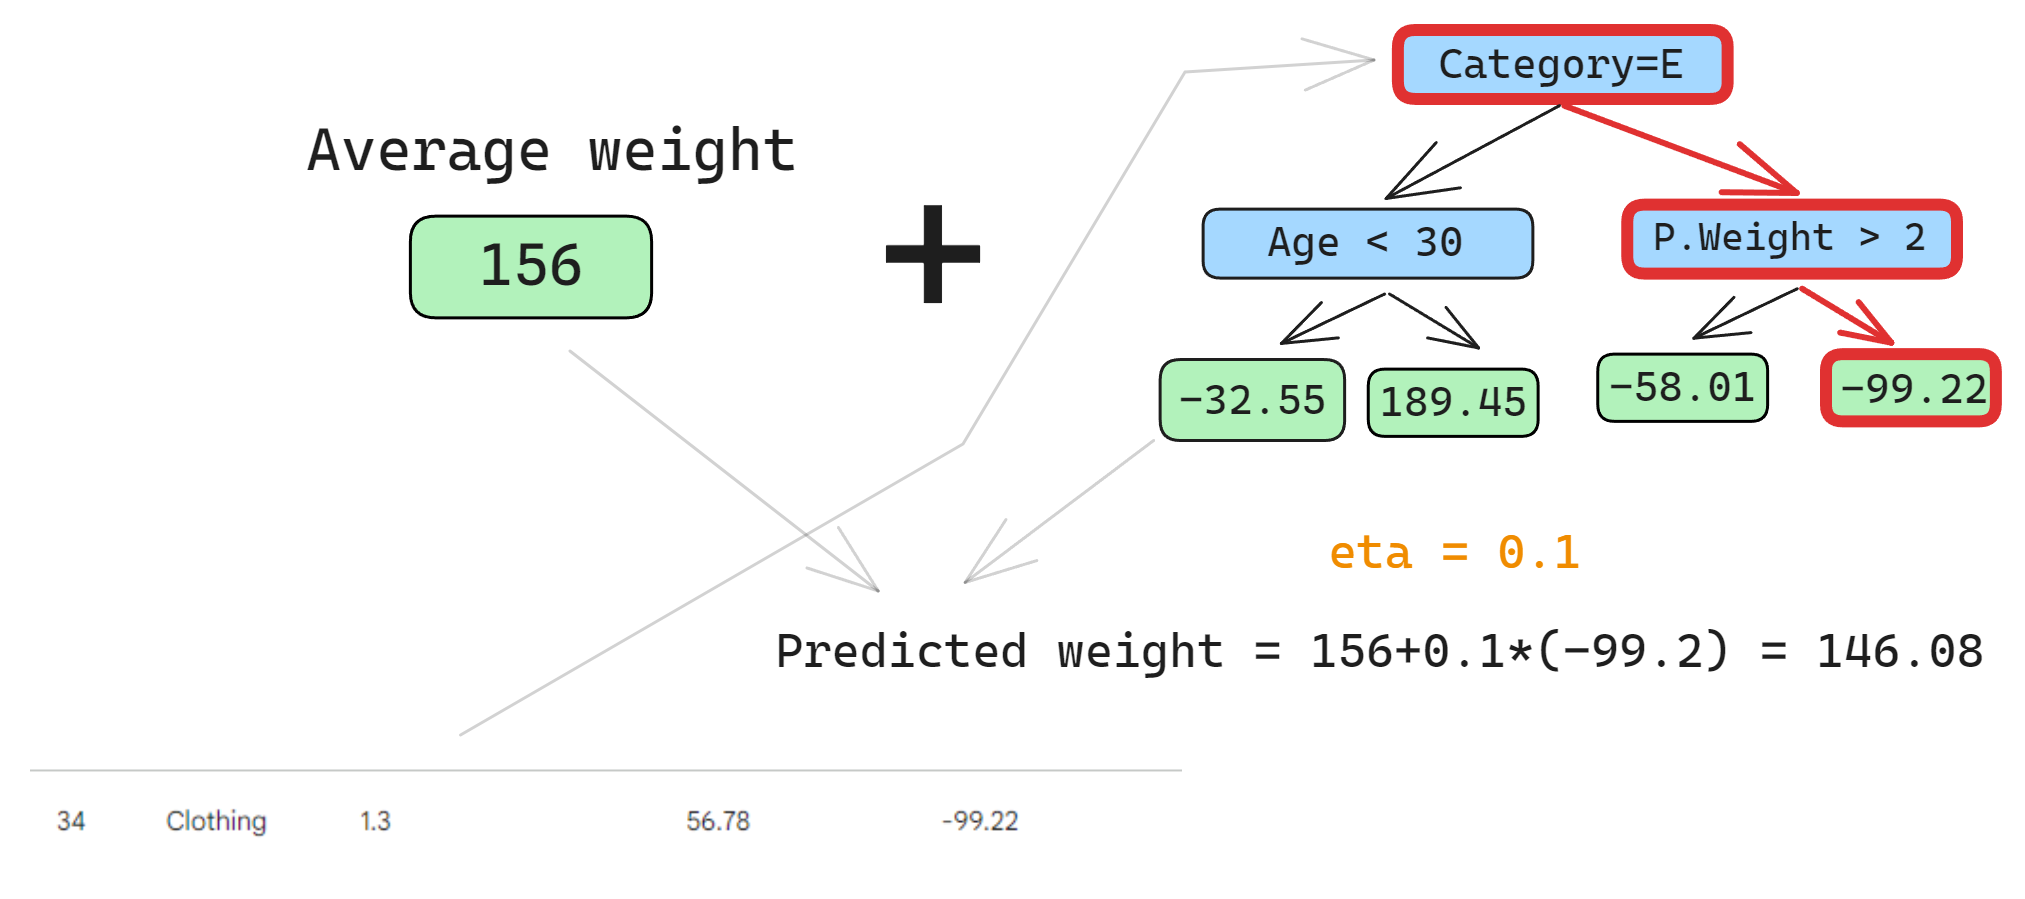

And we continue in this fashion for all rows until we have four predictions for four rows: 152.75, 146.08, 174.945, 150.2. 

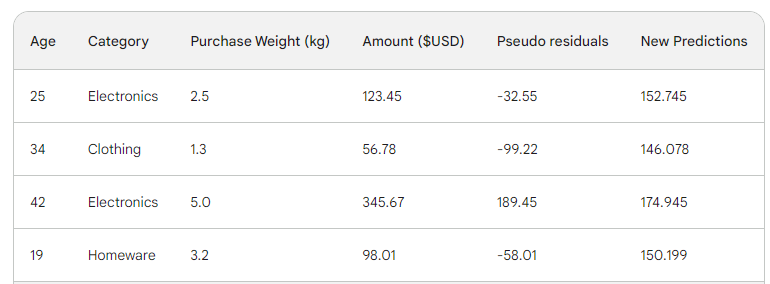

Next, we find the new pseudo-residuals by subtracting new predictions from purchase amount. Let's add them as a new column to the table and drop the last two:

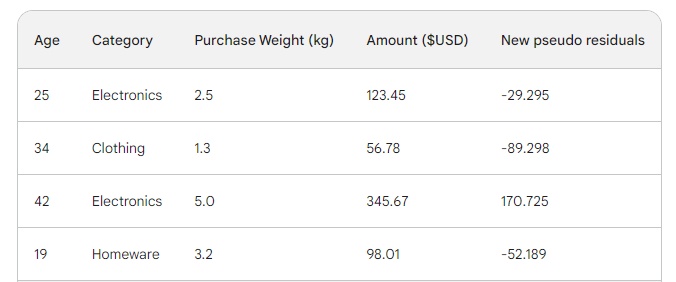


As you can see, our new pseudo residuals are smaller, which means our loss is going down.

### Step 4: Iterate

In the next steps, we iterate on step 3, i.e. build more weak learners. The only thing to remember is that we have to keep adding the residuals of each tree to the initial prediction to generate the next. 

For example, if we build 10 trees and the residuals of each tree is denoted as r_i (0 <= i <= 9), the next prediction would become `p_10 = 156 + eta * (r_1 + r_2 + ... + r_10)` where `p_10` is prediction in the tenth round.

In practice, professionals often start with 100 trees, not just ten. In this case, the algorithm is said to train for 100 _boosting rounds_. 

If you don't know the exact number of trees you need for your specific problem, you can use a simple technique called **early stopping**.

In early stopping, we choose a large number of trees like 1000 or 10000. Then, instead of waiting for the algorithm to finish building all those trees, we monitor the loss. If the loss doesn't improve for certain number of boosting rounds, for example 50, we stop training earlier saving time and computation resources.

## Configuring gradient boosting models

In machine learning, configuring any model is called hyperparameter tuning. A hyperparameter of a model is an option that needs to be set by the machine learning engineer. The model can't learn the optimal values for a hyperparameter through training. 

Gradient boosting models have many hyperparameter, some of which I will outline below. 

- **Objective**: this parameter sets the direction and the loss function of the algorithm. If the objective is regression, MSE is chosen as a loss function whereas for classification, Cross-Entropy is the one to go. Python libraries like XGBoost offer other objectives for other types of tasks like ranking with corresponding loss functions. 
- **Learning rate**: the most important hyperparameter of gradient boosting is perhaps learning rate. It controls the contribution of each weak learner by adjusting the shrinkage factor. Smaller values (towards 0) decreases how much say each weak learner has in the ensemble. This requires to build more trees and thus, more time to finish training. But, the resulting strong learner will indeed be strong and impervious to overfitting.

- **The number of trees**: This parameter, also called the number of boosting rounds or `n_estimators`, controls the number of trees to build. The more trees you build, the stronger and performant the ensemble becomes. It also becomes more complex as more trees allows the model to capture more patterns in the data. However, more trees significantly improve the chances of overfitting. To mitigate this, employ a combination of early stopping and low learning rate.

- **Max depth**: This parameter controls the number of levels in each weak learner (decision tree). A max depth of 3 means there are three levels in the tree, counting the leaf level. The deeper the tree, the more complex and computationally expensive the model becomes. Choose a value close to 3 to prevent overfitting. Your maximum should be a depth of 10.

- **Minimum number of samples per leaf**: This parameter controls how branches split in decision trees. Setting a low value for the number of samples in termination nodes (leaves) makes the overall algorithm sensitive to noise. A larger minimum number of samples helps to prevent overfitting by making it more difficult for the trees to create splits based on too few data points.

- **Subsampling rate**: This parameter controls the proportion of the data used to train each tree. In the examples above, we used 100% of rows as there were only four rows in our dataset. But, real-world datasets often have much more and require sampling. So, if you set subsampling rate to a value below 1, such as 0.7, each weak learner trains on the randomly sampled 70% of the rows. A smaller subsample rate can lead to faster training but can also lead to overfitting.

- **Feature sampling rate**: This parameter is exactly like subsampling but it samples rows. For datasets with hundreds of features, it is recommended to choose a feature sampling rate between 0.5 and 1 to lower the chance of overfitting. 

Gradient boosting is the most capable model we have for tabular supervised learning tasks. So, most of the time, you don't have to worry about it being not good enough for a task. When you use gradient boosting, your time is almost always spent on how to regularize it - to tame its power so that it doesn't just swallow your dataset and become useless when it comes to unseen data.

The hyperparameters I've introduced all help you in this task and they are included into every implementation of gradient boosting in Python. Use them well.

## Gradient boosting implemented in Python

As I mentioned before, gradient boosting is well-established through Python libraries. Here are the main four:
- **XGBoost**: eXtreme Gradient Boosting
- **LightGBM**: Light Gradient Boosting Machine
- **CatBoost**: Categorical Boosting
- **Scikit-learn**: Has two estimators for regression and classification

The first three libraries are similar to each other:
- Dominant performance
- GPU-support
- Rich set of hyperparameters (configuration-friendly)
- Very high community support
- Used extensively in industry

A popular alternative to all these three libraries is Scikit-learn with the disadvantage of being CPU-only. Since gradient boosting is a computation-heavy algorithm, running it on CPU could be infeasible for large datasets (we are talking about hundreds of thousands of rows). 

However, we have to remember that Scikit-learn, on its own, is more popular than the three libraries put together. Apart from the two gradient boosting estimators for classification and regression, Scikit-learn offers dozens of other models for a myriad of supervised and unsupervised learning tasks. 

Besides, gradient boosting models built with Scikit-learn could be integrated into its rich ecosystem like pipelines, cross-validation estimators, data processors, etc. 

Here is a step-by-step guide on how to do classification with `GradientBoostingClassifier`. We will predict the cut quality of diamonds based on their price and other physical measurements. This dataset is built into the Seaborn library. 

> Pro tip: Use the "Explain code" button of DataCamp code snippets editor to get a detailed line-by-line explanation of what's going on.

1. Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

2. Load data

In [4]:
# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset("diamonds")

# Split data into features and target
X = diamonds.drop("cut", axis=1)
y = diamonds["cut"]

3. Split the data

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

4. Define categorical and numerical features

In [6]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(
    include=["object"]
).columns.tolist()
numerical_features = X.select_dtypes(
    include=["float64", "int64"]
).columns.tolist()

5. Define preprocessing steps for categorical and numerical features

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", StandardScaler(), numerical_features),
    ]
)

6. Create a Gradient Boosting Classifier pipeline

In [9]:
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(random_state=42)),
    ]
)

7. CV and training

In [10]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

8. Report the final results

In [11]:
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(report)

Mean Cross-Validation Accuracy: 0.7621

Classification Report:
              precision    recall  f1-score   support

        Fair       0.90      0.91      0.91       335
        Good       0.81      0.63      0.71      1004
       Ideal       0.82      0.91      0.86      4292
     Premium       0.70      0.86      0.77      2775
   Very Good       0.66      0.41      0.51      2382

    accuracy                           0.76     10788
   macro avg       0.78      0.74      0.75     10788
weighted avg       0.75      0.76      0.75     10788



The weighted accuracy is 75%, which is not bad for a baseline model with default parameters. So, as a challenge, I leave it to you to tune the hyperparameters of `GradientBoostingClassifier` to achieve over 95% performance. Yes, it is possible! (Hint: read the last section carefully and check out [the Scikit-learn docs for the classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)).

## Conclusion and further learning

Even though we've learned a ton, the main focus of the article was on the inner workings of gradient boosting algorithm. Understanding how it works does not translate to being able to use it well in practice. However, intuitive understanding is always a huge help.

For further learning, I recommend the follow resources:
- [Gradient Boost playlist by StatQuestion](https://youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6&si=GMjSizSRs8o_2uqA): covers both the math and intuition behind the algorithm.
- [Using Gradient Boosting with XGBoost by DataCamp](https://www.datacamp.com/tutorial/xgboost-in-python): #1 ranking article on XGBoost on Google, written by yours truly
- [Extreme Gradient Boosting With XGBoost Course](https://www.datacamp.com/courses/extreme-gradient-boosting-with-xgboost): A comprehensive course on XGBoost
- [Kaggler’s Guide to LightGBM Hyperparameter Tuning with Optuna](https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5): LightGBM is an open-source implementation of gradient boosting by Microsoft
- [10 Confusing XGBoost Hyperparameters and How to Tune Them Like a Pro in 2023](https://towardsdatascience.com/10-confusing-xgboost-hyperparameters-and-how-to-tune-them-like-a-pro-in-2023-e305057f546): Here, I talk about the most critical hyperparameters of gradient boosting in depth.

Thank you for reading!